<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/CNN_Image_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 이미지 분류

## 1. 데이터 전처리(Data Preprocessing)

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
# CIFAR-10은 10가지 클래스를 갖는 데이터셋 -> ex: 비행기, 트럭, 자동차, ...
from torchvision.transforms import ToTensor

# Load CIFAR-10 Dataset
training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = ToTensor())

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = ToTensor())

100%|██████████| 170498071/170498071 [00:05<00:00, 28833307.08it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


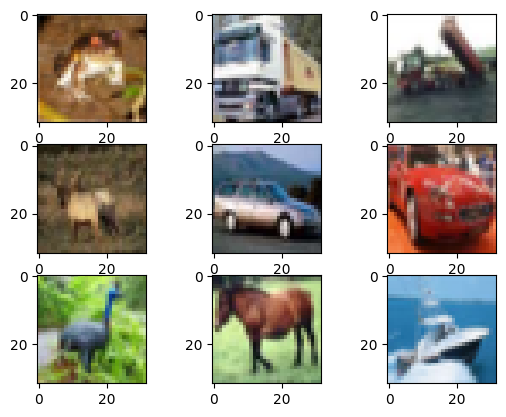

In [3]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(training_data.data[i])
plt.show()

## 1_2. 데이터 증강(Data Augmentation)
- 크롭핑(cropping): 이미지의 일정 부분을 도려내는 기법. 불필요한 부분을 도려낼 때 사용
- 좌우대칭(horizontal flip)
- 크롭핑과 좌우대칭 후, 이미지 크기에는 변화가 없도록 패딩 기법을 사용해 잘라낸 부분을 0으로 채우기
  - 패딩(padding): 이미지의 특정 영역을 0(혹은 아무 값)으로 채우는 기법. 0으로 채우면 제로 패딩이라고 함

|함수 원형|설명|제공 라이브러리|
|---|---|---|
|Compose([*tf])|전처리 함수 tf를 입력받아 차례대로 실행|torchvision.transforms|
|RandomCrop(size)|이미지의 일부를 제거한 뒤 size 크기로 복원|torchvision.transforms|
|RandomHorizontalFlip(p)|p 확률로 이미지를 좌우대칭 시킴|torchvision.transforms|

Files already downloaded and verified
Files already downloaded and verified


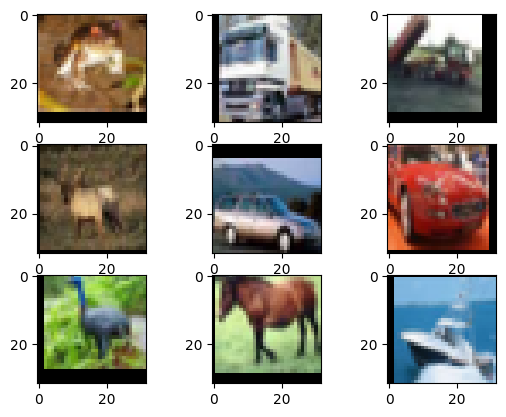

In [7]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # 데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4), # 랜덤으로 이미지 일부 제거 후 padding
    RandomHorizontalFlip(p=0.5) # y축을 기준으로 좌우대칭
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

## 1_3. 이미지 정규화(image normalization)

- R, G, B 한쪽에 값이 편향되어 있으면 학습에 안 좋은 영향을 끼칠 수 있으므로 최대한 정규분포를 따르도록 정규화하는 작업이 필요

* 정규화(normalization)
- 데이터의 분포를 <b>정규분포</b>의 형태로 바꿔주는 것
  - 정규분포(normal distribution, gaussian distribution): 평균과 표준편차를 설명하는 분포 / 평균이 0, 표준편차가 1인 정규분포를 표준분포라고 한다.

### CIFAR10 Dataset의 평균과 표준편차 구하기
|함수 원형|설명|제공 라이브러리|
|---|---|---|
|stack(tesnor, dim)|tensor가 dim 방향으로 합쳐준다. 예를 들어(224, 224) 크기의 텐서를 dim=0 방향으로 텐서 세 개를 합치면 (3, 224, 224) 모양의 텐서가 된다.|torch|

In [16]:
import torch

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = ToTensor())

imgs = [item[0] for item in training_data]

# imgs를 하나로 합침
imgs = torch.stack(imgs, dim=0).numpy()

# rgb 각 평균
mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()
print('mean')
print(f'R:{mean_r:.4f}, G:{mean_g:.4f}, B:{mean_b:.4f}')

# rgb 각 표준편차
std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 1, :, :].std()
std_b = imgs[:, 2, :, :].std()
print('std')
print(f'R:{std_r:.4f}, G:{std_g:.4f}, B:{std_b:.4f}')

Files already downloaded and verified
mean
R:0.4914, G:0.4822, B:0.4465
std
R:0.2470, G:0.2435, B:0.2616


Files already downloaded and verified
Files already downloaded and verified


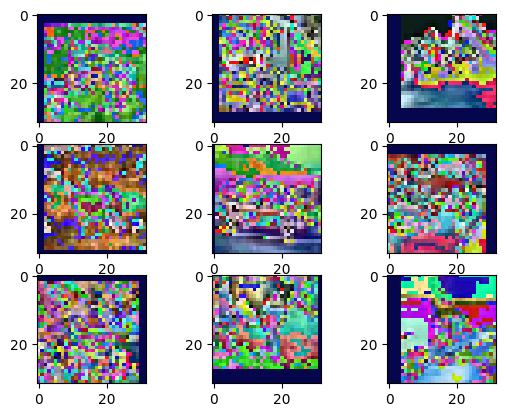

In [8]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([ # 데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4), # 랜덤으로 이미지 일부 제거 후 padding
    RandomHorizontalFlip(p=0.5), # y축을 기준으로 좌우대칭
    T.ToTensor(),

    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
    T.ToPILImage()
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()